In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide
%cd /content/drive/MyDrive
!git clone https://gitlab.eumetsat.int/eumetlab/data-services/eumdac.git
%cd eumdac
!pip install eumdac

In [ ]:
# !eumdac describe
# !eumdac search --query "pi=EO:EUM:DAT:MSG:HRSEVIRI-IODC"
# !eumdac search -c EO:EUM:DAT:MSG:HRSEVIRI-IODC --start 2023-01-01T00:00 --end 2023-01-01T23:45 --satellite MSG2
!eumdac describe -c EO:EUM:DAT:MSG:HRSEVIRI-IODC


In [2]:
!apt-get install libeccodes-tools
!pip install cartopy
!pip install satpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ed libeccodes-data libeccodes0 mksh
The following NEW packages will be installed:
  ed libeccodes-data libeccodes-tools libeccodes0 mksh
0 upgraded, 5 newly installed, 0 to remove and 39 not upgraded.
Need to get 3,144 kB of archives.
After this operation, 61.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 ed amd64 1.18-1 [55.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeccodes-data all 2.24.2-1 [1,592 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeccodes0 amd64 2.24.2-1 [614 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mksh amd64 59c-16 [580 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeccodes-tools amd64 2.24.2-1 [303 kB]
Fetched 3,144 kB in 0s (17.7 MB/s)
Selecting previously unselected package ed.

In [ ]:
!apt-get update
!apt-get install gdal-bin
!apt-get install libgdal-dev
!export CPLUS_INCLUDE_PATH=/usr/include/gdal
!export C_INCLUDE_PATH=/usr/include/gdal
!pip install GDAL

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.Aborted.
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease


In [ ]:
# Clone the repository with submodules
!git clone --recurse-submodules https://github.com/ARPA-SIMC/meteosatlib.git

# Navigate to the Meteosatlib directory
!%cd meteosatlib

# Run autotools commands
!autoreconf -ifv
!./configure
!make
!make check  # optional
!make install


In [ ]:
from google.colab import drive
import os
import shutil

def setup_meteosatlib():
    # Mount Google Drive
    drive.mount('/content/drive')

    # Define paths
    drive_path = '/content/drive/MyDrive'
    meteosatlib_path = os.path.join(drive_path, 'meteosatlib')

    # Clone meteosatlib repository with submodules
    !git clone --recurse-submodules https://github.com/ARPA-SIMC/meteosatlib.git "$meteosatlib_path"

    # Navigate to meteosatlib directory
    os.chdir(meteosatlib_path)

    # Install necessary dependencies
    !sudo apt-get update
    !sudo apt-get install -y autoconf automake libtool help2man libgdal-dev  # Add libgdal-dev for cpl_string.h


    # Run autotools commands
    !autoreconf -ifv
    !./configure
    !sudo make
    # Note: 'make check' is optional and can be executed if desired
    # !make check
    !sudo make install

# Call the function
setup_meteosatlib()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path '/content/drive/MyDrive/meteosatlib' already exists and is not an empty directory.
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done

In [ ]:
!unzip 'drive/MyDrive/RAW_HRIT/HRIT' -d 'drive/MyDrive/RAW_HRIT'

In [ ]:
!msat --png --Area="37,49,5,20" '/content/drive/MyDrive/RAW_HRIT/13-00/H-000-MSG2__-MSG2_IODC___'

/bin/bash: line 1: msat: command not found


In [ ]:
# https://satpy.readthedocs.io/en/latest/_modules/satpy/readers/seviri_base.html
# https://github.com/ARPA-SIMC/meteosatlib/blob/master/examples/products
# https://www-cdn.eumetsat.int/files/2020-04/pdf_conf_p_s5_01_celano_v.pdf
# https://github.com/ARPA-SIMC/meteosatlib/wiki/Examples

/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


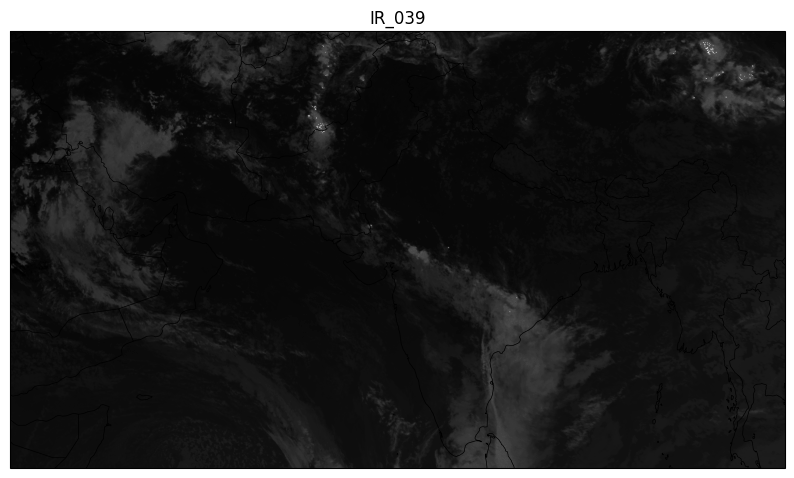

In [ ]:
# Original
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os

CHANNEL_NAMES = {1: "VIS006",
                 2: "VIS008",
                 3: "IR_016",
                 4: "IR_039",
                 5: "WV_062",
                 6: "WV_073",
                 7: "IR_087",
                 8: "IR_097",
                 9: "IR_108",
                 10: "IR_120",
                 11: "IR_134",
                 12: "HRV"}

VIS_CHANNELS = ["HRV", "VIS006", "VIS008", "IR_016"]
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
channel = CHANNEL_NAMES[4]  # Choose your desired channel

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "/content/drive/MyDrive/RAW_HRIT/14-00"

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

# Create a Scene object
scn1 = Scene(reader='seviri_l1b_hrit', filenames=fnames)

scn1.load([channel])

# Access product data (modify channel if needed)
product = scn1[channel]
data = product.data

# Retrieve the projection of the satellite data
proj = product.attrs['area'].to_cartopy_crs()
transformProj = ccrs.Mercator()
# Create a plot with Cartopy
plt.figure(figsize=(10, 8))

# Define the projection and extent
ax = plt.axes(projection=transformProj)
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

# Plot the data
plt.imshow(data, extent=proj.bounds, transform=proj, cmap='gray_r')

# Add colorbar
# plt.colorbar(label='Brightness Temperature (K)')

# Add title
plt.title(channel)

plt.show()


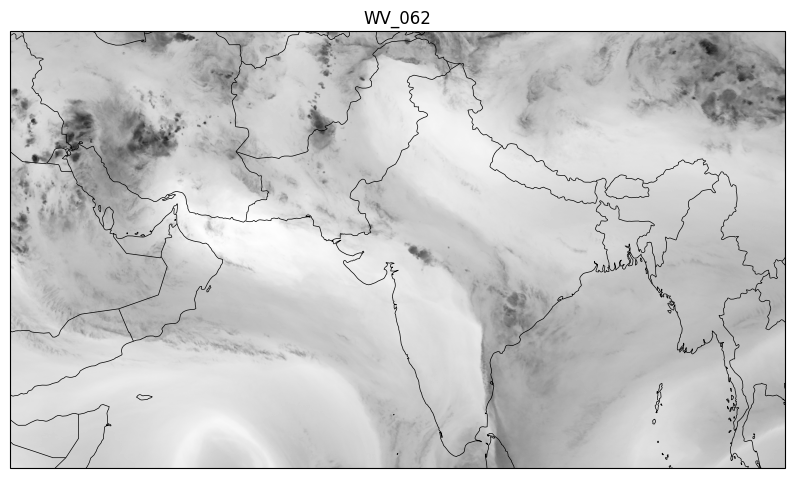

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os

CHANNEL_NAMES = {
    1: "VIS006",
    2: "VIS008",
    3: "IR_016",
    4: "IR_039",
    5: "WV_062",
    6: "WV_073",
    7: "IR_087",
    8: "IR_097",
    9: "IR_108",
    10: "IR_120",
    11: "IR_134",
    12: "HRV"
}

VIS_CHANNELS = ["HRV", "VIS006", "VIS008", "IR_016"]
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
channel = CHANNEL_NAMES[5]  # Choose your desired channel

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

# Create a Scene object
scn1 = Scene(reader='seviri_l1b_hrit', filenames=fnames)

scn1.load([channel])

# Access product data (modify channel if needed)
product = scn1[channel]
data = product.data

# Previous calibration parameters
CALIB = {
    "HRV": {"F": 79.0113},
    "VIS006": {"F": 65.2065},
    "VIS008": {"F": 73.1869},
    "IR_016": {"F": 61.9923},
    "IR_039": {"VC": 2568.832, "ALPHA": 0.9954, "BETA": 3.438},
    "WV_062": {"VC": 1600.548, "ALPHA": 0.9963, "BETA": 2.185},
    "WV_073": {"VC": 1360.330, "ALPHA": 0.9991, "BETA": 0.47},
    "IR_087": {"VC": 1148.620, "ALPHA": 0.9996, "BETA": 0.179},
    "IR_097": {"VC": 1035.289, "ALPHA": 0.9999, "BETA": 0.056},
    "IR_108": {"VC": 931.7, "ALPHA": 0.9983, "BETA": 0.64},
    "IR_120": {"VC": 836.445, "ALPHA": 0.9988, "BETA": 0.408},
    "IR_134": {"VC": 751.792, "ALPHA": 0.9981, "BETA": 0.561}
}

# Additional calibration coefficients
MEIRINK_COEFS = {
    "VIS006": (21.026, 0.2556),
    "VIS008": (26.875, 0.1835),
    "IR_016": (21.394, 0.0498)
}

# Apply calibration if available
calibration_params = CALIB.get(channel, {})
meirink_coefs = MEIRINK_COEFS.get(channel, ())
if calibration_params:
    if "F" in calibration_params:
        data = data * calibration_params["F"]
    elif all(key in calibration_params for key in ("VC", "ALPHA", "BETA")):
        data = calibration_params["VC"] / (calibration_params["ALPHA"] * (data - calibration_params["BETA"]))

# Apply additional calibration coefficients if available
if meirink_coefs:
    alpha, beta = meirink_coefs
    if isinstance(alpha, float) and isinstance(beta, float):
        data = alpha * data + beta

# Retrieve the projection of the satellite data
proj = product.attrs['area'].to_cartopy_crs()
transformProj = ccrs.Mercator()
# Create a plot with Cartopy
plt.figure(figsize=(10, 8))

# Define the projection and extent
ax = plt.axes(projection=transformProj)
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

# Plot the data
plt.imshow(data, extent=proj.bounds, transform=proj, cmap='gray_r')

# Add colorbar
# plt.colorbar(label='Brightness Temperature (K)')

# Add title
plt.title(channel)

plt.show()


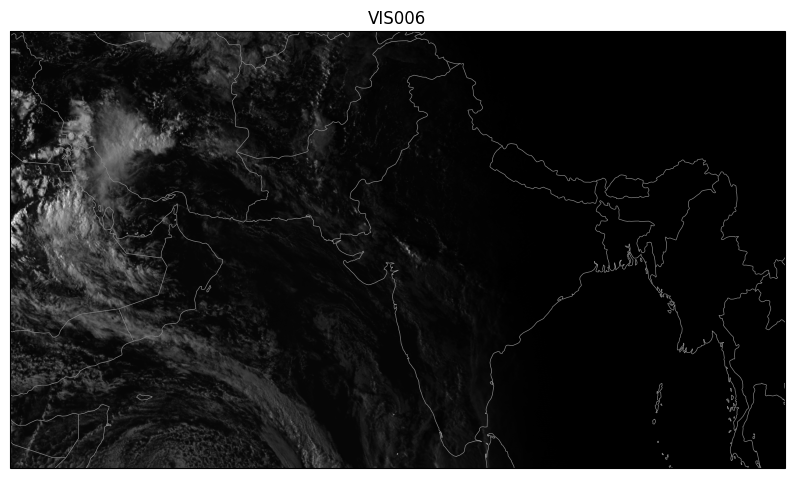

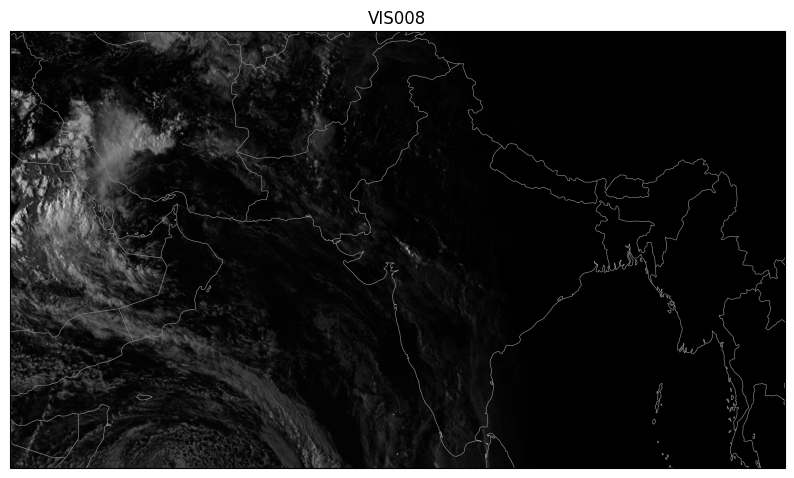

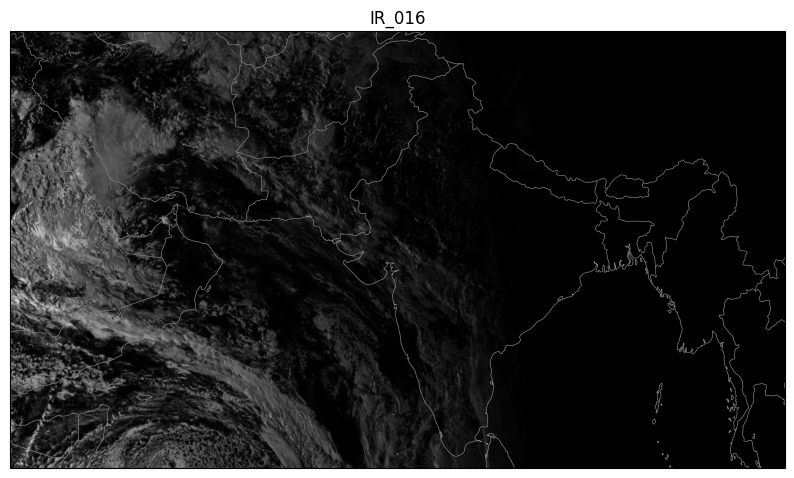

/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


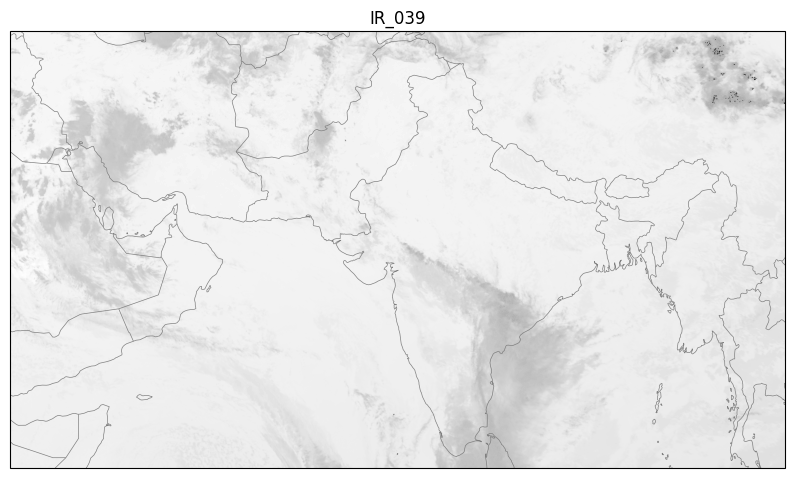

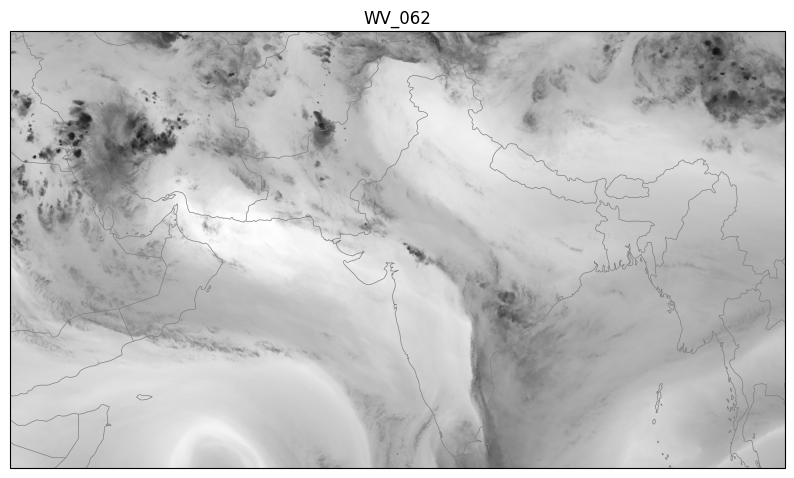

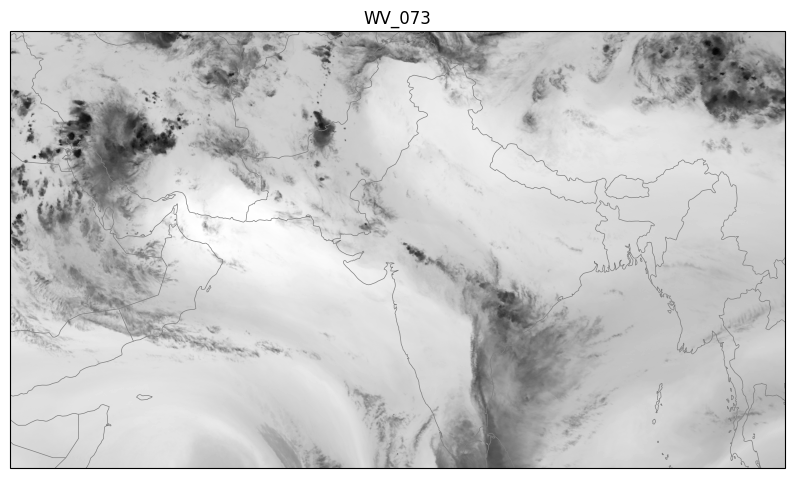

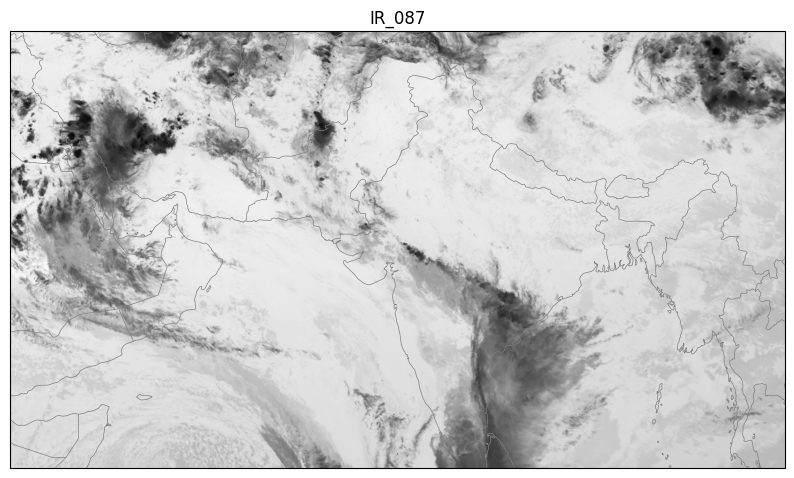

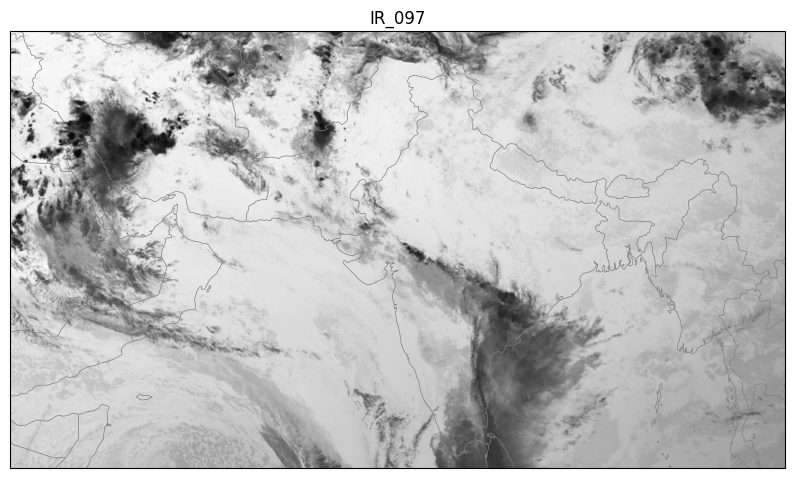

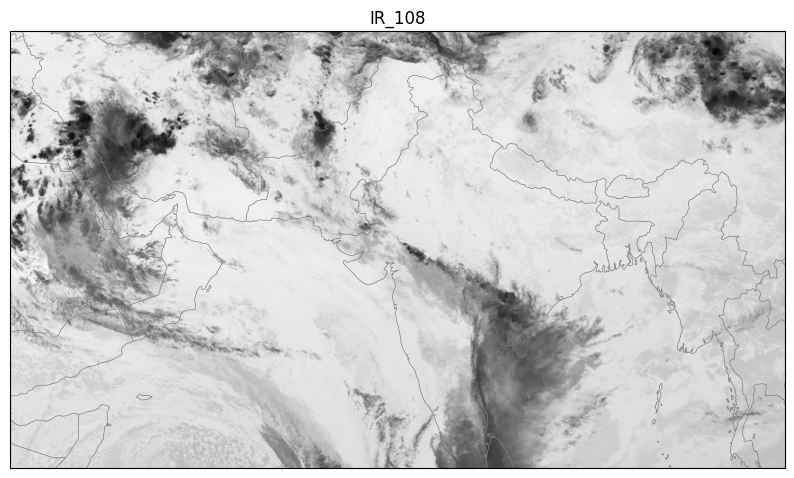

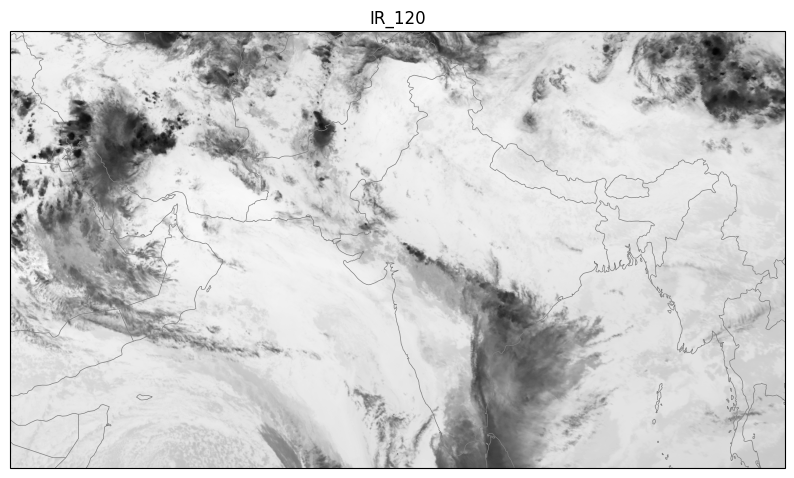

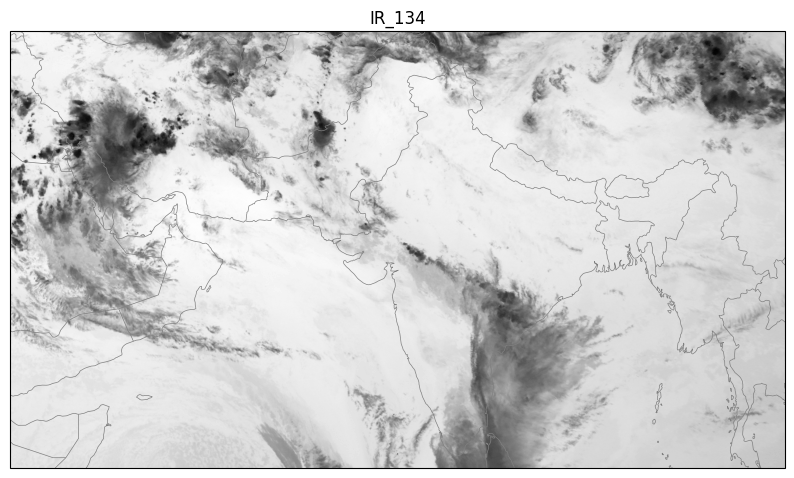

/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os

CHANNEL_NAMES = {1: "VIS006",
                 2: "VIS008",
                 3: "IR_016",
                 4: "IR_039",
                 5: "WV_062",
                 6: "WV_073",
                 7: "IR_087",
                 8: "IR_097",
                 9: "IR_108",
                 10: "IR_120",
                 11: "IR_134",
                 12: "HRV"}

def generate_product(data_dir, channel, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    scn.load([channel])

    # Access product data (modify channel if needed)
    product = scn[channel]
    data = product.data

    # Retrieve the projection of the satellite data
    proj = product.attrs['area'].to_cartopy_crs()
    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=transformProj)
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5, edgecolor='gray')

    # Plot the data
    plt.imshow(data, extent=proj.bounds, transform=proj, cmap='gray')

    # Add title
    plt.title(channel)

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "/content/drive/MyDrive/RAW_HRIT/13-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate each product
for channel_name in CHANNEL_NAMES.values():
    generate_product(data_dir, channel_name, latBound, lngBound)


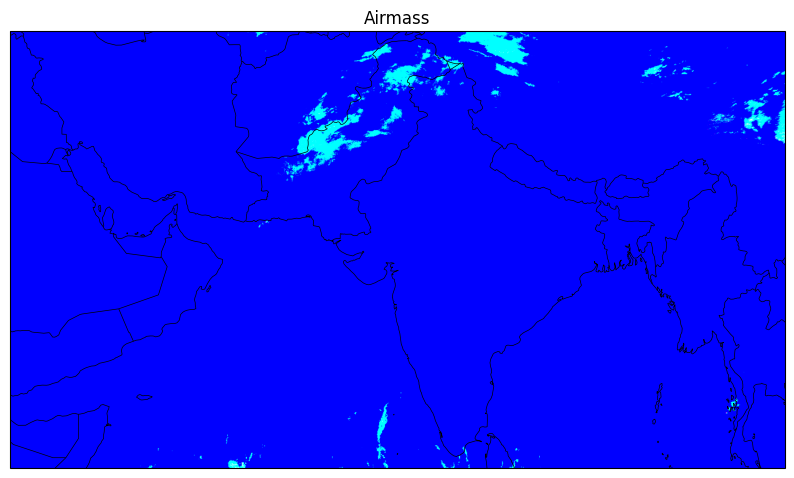

In [ ]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os

def rescale(arr, imin, imax, omin, omax, out=None):
    if np.ma.is_masked(arr):
        arr[arr.mask] = imin

    if imin <= imax:
        res = np.clip(arr, imin, imax, out)
        res -= imin
        res = np.multiply(res, float(omax-omin) / float(imax-imin))
        res += omin
    else:
        res = np.clip(arr, imax, imin, out)
        res -= imin
        res = np.multiply(res, -(float(omax-omin) / float(imin-imax)))
        res += omin
    return res

def volcanic_ash_rgb(scn):
    product_label ="Volcanic Ash"
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = rescale(ir108 - ir087, -4, 5, 0, 255)
    b = rescale(ir108, 243, 303, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image

def generate_dust_rgb(scn):
    product_label ="Dust RGB Product"
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (np.power(rescale(ir108 - ir087, 0, 15, 0, 1), 1/2.5)) * 255
    b = rescale(ir108, 261, 289, 0, 255)
    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image

def water_vapor_rgb(scn):
    product_label = "Water Vapor"
    channels = ["WV_062", "WV_073", "IR_039", "IR_108", "IR_016", "VIS006"]
    scn.load(channels)
    proj = scn["WV_062"].attrs['area'].to_cartopy_crs()

    wv62 = scn["WV_062"].data
    wv73 = scn["WV_073"].data
    ir039 = scn["IR_039"].data
    ir108 = scn["IR_108"].data
    ir016 = scn["IR_016"].data
    vis006 = scn["VIS006"].data
    # ir016r = scn["IR_016"].reflectance
    # vis06r = scn["VIS006"].reflectance

    r = rescale(wv62 - wv73, -35, 5, 0, 255)
    g = (rescale(ir039 - ir108, -5, 60, 0, 1) ** (1 / 0.5)) * 255
    b = rescale(ir016 - vis006, -75, 25, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image

def H24Micro(scn):
    product_label = "H24Micro"
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()

    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (rescale(ir108 - ir087, 0, 6, 0, 1) ** (1 / 1.2)) * 255
    b = rescale(ir108, 248, 303, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj,product_label, rgb_image

def Airmass(scn):
    product_label = "Airmass"
    channels = ["WV_062", "WV_073", "IR_097", "IR_108"]
    scn.load(channels)
    proj = scn["WV_062"].attrs['area'].to_cartopy_crs()

    wv62 = scn["WV_062"].data
    wv73 = scn["WV_073"].data
    ir097 = scn["IR_097"].data
    ir108 = scn["IR_108"].data

    # r = rescale(wv62 - wv73, -25, 0, 0, 255)
    # g = rescale(ir097 - ir108, -40, 5, 0, 255)
    # b = rescale(wv62, 243, 208, 0, 255)

    r = wv62 - wv73
    g = ir097 - ir108
    b = wv62

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image



def generate_product(productGenerateFn ,data_dir, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    # Compute RGB values
    proj, productTitle, rgbImage = productGenerateFn(scn)

    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the RGB image
    plt.imshow(rgbImage, extent=proj.bounds, transform=proj, origin='upper')

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Add title
    plt.title(productTitle)

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "/content/drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate dust RGB product
# generate_product(generate_dust_rgb, data_dir, latBound, lngBound)
generate_product(Airmass, data_dir, latBound, lngBound)


In [ ]:
!python drive/MyDrive/products.py -s drive/MyDrive/RAW_HRIT -d drive/MyDrive/RAW_HRIT --products Dust,VolcanicAsh,EnhancedIr


ERROR 4: drive/MyDrive/RAW_HRIT/H:MSG3:IR_087:202403020715: No such file or directory
Traceback (most recent call last):
  File "/content/drive/MyDrive/products.py", line 904, in <module>
    sat.make_product(prod, args.format, args.shp, destdir=args.destdir)
  File "/content/drive/MyDrive/products.py", line 273, in make_product
    res = maker.compute()
  File "/content/drive/MyDrive/products.py", line 491, in compute
    ir087 = self.sat.IR_087.data
  File "/content/drive/MyDrive/products.py", line 107, in data
    self.cached_data = self.sat.get_array(self.name)
  File "/content/drive/MyDrive/products.py", line 210, in get_array
    rb = ds.GetRasterBand(1)
AttributeError: 'NoneType' object has no attribute 'GetRasterBand'


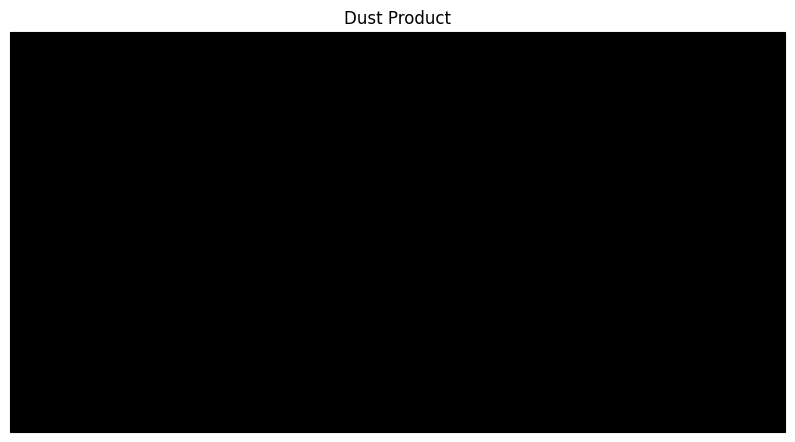

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os
import numpy as np

CHANNEL_NAMES = {1: "VIS006",
                 2: "VIS008",
                 3: "IR_016",
                 4: "IR_039",
                 5: "WV_062",
                 6: "WV_073",
                 7: "IR_087",
                 8: "IR_097",
                 9: "IR_108",
                 10: "IR_120",
                 11: "IR_134",
                 12: "HRV"}

def arr_filled(arr, value):
    for i in range(len(arr)):
        arr[i] = value
    return arr

def rescale(arr, imin, imax, omin, omax, out=None):
    """
    Rescale values of the array from [imin, imax] to [omin, omax], clipping
    outliers to omin or omax
    """
    # Fill masked data with the minimum sample value
    arr = arr_filled(arr, imin)

    if imin <= imax:
        res = np.clip(arr, imin, imax, out)
        res -= imin
        res = np.multiply(res, float(omax-omin) / float(imax-imin), casting="unsafe")
        res += omin
    else:
        res = np.clip(arr, imax, imin, out)
        res -= imin
        res = np.multiply(res, -(float(omax-omin) / float(imin-imax)), casting="unsafe")
        res += omin
    return res

def generate_dust_product(data_dir, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    # Load necessary channels
    scn.load(["IR_087", "IR_108", "IR_120"])

    # Access product data
    ir087 = scn["IR_087"]
    ir108 = scn["IR_108"]
    ir120 = scn["IR_120"]

    # Create an instance of the Dust product
    dust_r = rescale(ir120 - ir108,  -4,   2, 0, 255)
    dust_g = (rescale(ir108 - ir087,  0,  15, 0, 1) ** (1/2.5)) * 255
    dust_b = rescale(ir108,         261, 289, 0, 255)

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection
    proj = ccrs.PlateCarree()  # Assuming data is in PlateCarree projection
    ax = plt.axes(projection=proj)
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the data
    plt.imshow(np.dstack((dust_r, dust_g, dust_b)), extent=(lngBound[0], lngBound[1], latBound[0], latBound[1]), transform=ccrs.PlateCarree())

    # Add coastlines
    ax.coastlines()

    # Add title
    plt.title("Dust Product")

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate the Dust product
generate_dust_product(data_dir, latBound, lngBound)


/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


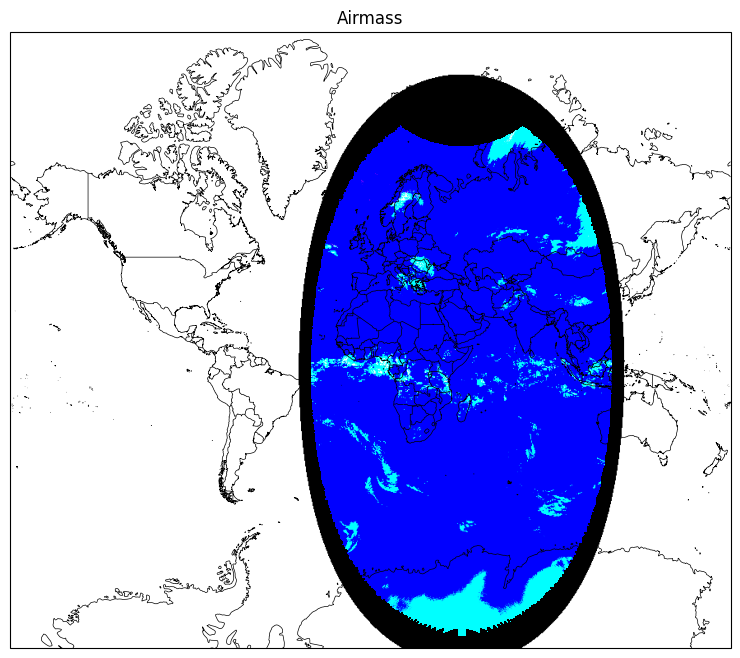

In [ ]:
import numpy as np

def rescale(arr, imin, imax, omin, omax, out=None):
    if np.ma.is_masked(arr):
        arr[arr.mask] = imin

    if imin <= imax:
        res = np.clip(arr, imin, imax, out)
        res -= imin
        res = np.multiply(res, float(omax-omin) / float(imax-imin))
        res += omin
    else:
        res = np.clip(arr, imax, imin, out)
        res -= imin
        res = np.multiply(res, -(float(omax-omin) / float(imin-imax)))
        res += omin
    return res

def volcanic_ash_rgb(scn):
    product_label ="Volcanic Ash"
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = rescale(ir108 - ir087, -4, 5, 0, 255)
    b = rescale(ir108, 243, 303, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image

def generate_dust_rgb(scn):
    product_label ="Dust RGB Product"
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (np.power(rescale(ir108 - ir087, 0, 15, 0, 1), 1/2.5)) * 255
    b = rescale(ir108, 261, 289, 0, 255)
    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image

def water_vapor_rgb(scn):
    product_label = "Water Vapor"
    channels = ["WV_062", "WV_073", "IR_039", "IR_108", "IR_016", "VIS006"]
    scn.load(channels)
    proj = scn["WV_062"].attrs['area'].to_cartopy_crs()

    wv62 = scn["WV_062"].data
    wv73 = scn["WV_073"].data
    ir039 = scn["IR_039"].data
    ir108 = scn["IR_108"].data
    ir016 = scn["IR_016"].data
    vis006 = scn["VIS006"].data
    # ir016r = scn["IR_016"].reflectance
    # vis06r = scn["VIS006"].reflectance

    r = rescale(wv62 - wv73, -35, 5, 0, 255)
    g = (rescale(ir039 - ir108, -5, 60, 0, 1) ** (1 / 0.5)) * 255
    b = rescale(ir016 - vis006, -75, 25, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image

def H24Micro(scn):
    product_label = "H24Micro"
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()

    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (rescale(ir108 - ir087, 0, 6, 0, 1) ** (1 / 1.2)) * 255
    b = rescale(ir108, 248, 303, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj,product_label, rgb_image

def Airmass(scn):
    product_label = "Airmass"
    channels = ["WV_062", "WV_073", "IR_097", "IR_108"]
    scn.load(channels)
    proj = scn["WV_062"].attrs['area'].to_cartopy_crs()

    wv62 = scn["WV_062"].data
    wv73 = scn["WV_073"].data
    ir097 = scn["IR_097"].data
    ir108 = scn["IR_108"].data

    # r = rescale(wv62 - wv73, -25, 0, 0, 255)
    # g = rescale(ir097 - ir108, -40, 5, 0, 255)
    # b = rescale(wv62, 243, 208, 0, 255)

    r = wv62 - wv73
    g = ir097 - ir108
    b = wv62

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return proj, product_label, rgb_image



def generate_product(productGenerateFn ,data_dir, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    # Compute RGB values
    proj, productTitle, rgbImage = productGenerateFn(scn)

    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=transformProj)
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the RGB image
    plt.imshow(rgbImage, extent=proj.bounds, transform=proj, origin='upper')

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Add title
    plt.title(productTitle)

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate dust RGB product
# generate_product(generate_dust_rgb, data_dir, latBound, lngBound)
generate_product(Airmass , data_dir, latBound, lngBound)


In [ ]:
! msat --view '/content/drive/MyDrive/RAW_HRIT/13-00/H:MSG2:IR_016:202402291300'

/bin/bash: line 1: msat: command not found


Don't know how to open the following files: {'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-VIS008___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-WV_062___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-VIS006___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_134___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_134___-_________-202312140000-__ preview.png', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_108___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-VIS006___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-WV_073___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_134___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H

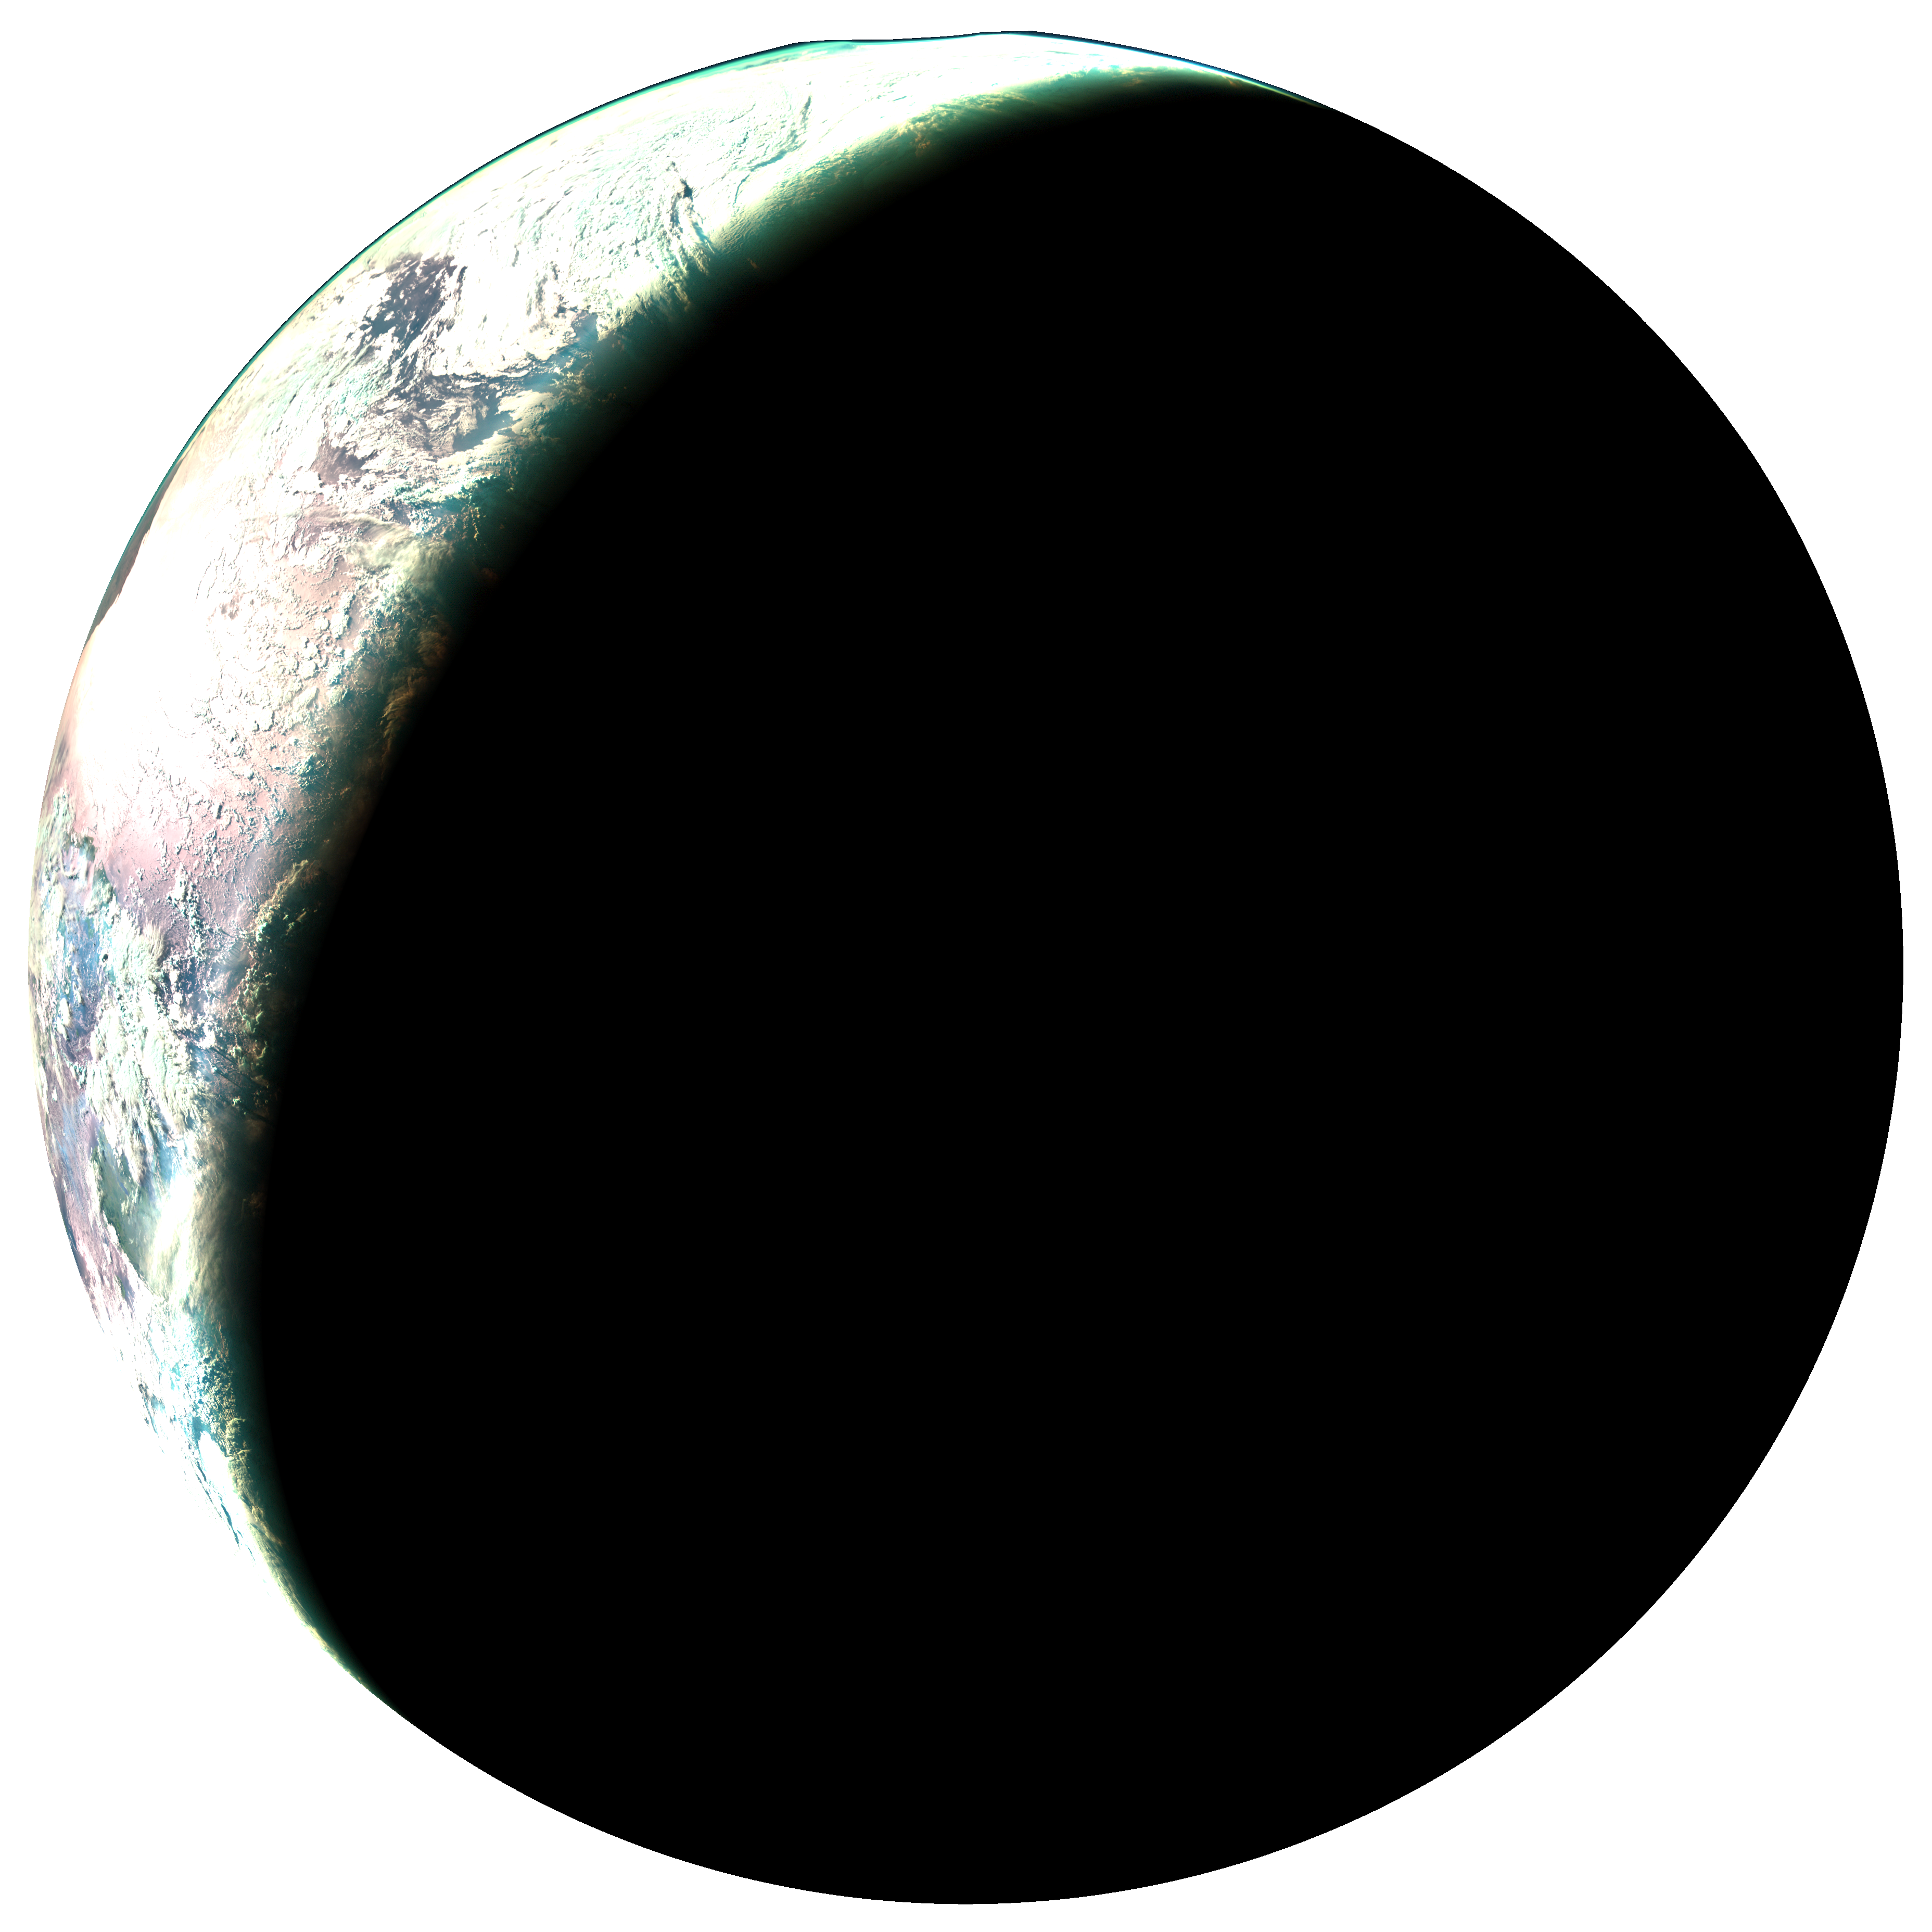

In [31]:
from satpy.scene import Scene
from satpy.resample import get_area_def
from satpy import find_files_and_readers
from datetime import datetime
import glob
import warnings
import os
import xarray as xr
from pyresample.geometry import AreaDefinition

# Date format in YYYYMMDDhhmm
data_dir = "T:/HRIT/2023-12-14/00-00"
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
extent = [lngBound[0], latBound[0], lngBound[1], latBound[1]]  # Corrected extent order

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

# Create a Scene object
scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

composite = 'natural_color'
scn.load([composite])
scn.show(composite)

# TODO: reproject the scene to the desired area with mercator projection
# my_area = AreaDefinition('my_area', {'proj': 'merc', 'lon_0': 45.5}, area_extent= [40,-10,105,40], units='degrees')

# new_scn = scn.resample(my_area)

# new_scn.show(composite)
# Crop the scene with the provided extent
# scn_cropped = scn.crop(ll_bbox=extent)

# Show the cropped scene
# scn_cropped.show(composite)


In [ ]:
# https://nbviewer.org/github/pytroll/pytroll-examples/blob/main/satpy/hrit_msg_tutorial.ipynb
from satpy.scene import Scene
from satpy.resample import get_area_def
from satpy import find_files_and_readers
from datetime import datetime
import glob
import warnings
import os

# Date format in YYYYMMDDhhmm
data_dir = "//EUMETCAST-INGES/Data/XRIT/Compressed"

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

# fnames = glob.glob('/path/to/data/H*202009060000*__')
scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)
scn.available_composite_ids()

composite = 'airmass'
scn.load([composite])
scn.show(composite)

Don't know how to open the following files: {'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-VIS008___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-WV_062___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-VIS006___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_134___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_134___-_________-202312140000-__ preview.png', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_108___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-VIS006___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-WV_073___-_________-202312140000-__ preview.nav', 'T:/HRIT/2023-12-14/00-00\\H-000-MSG2__-MSG2_IODC___-IR_134___-_________-202312140000-__ preview.nmf', 'T:/HRIT/2023-12-14/00-00\\H

MemoryError: Unable to allocate 13.8 GiB for an array with shape (750, 1331, 3712) and data type float32

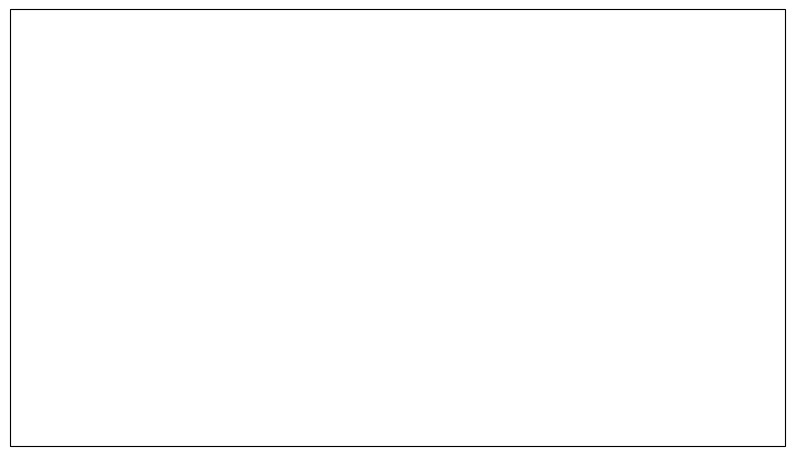

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
from satpy.resample import get_area_def
from datetime import datetime
import matplotlib.pyplot as plt
import os
import numpy as np

def process(scn,productCompositeKey):
    scn.load([productCompositeKey, "IR_120"])
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    rgb_image = scn[productCompositeKey]
    return proj,rgb_image

def generate_product(productCompositeKey, productLabel ,data_dir, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    # Compute RGB values
    proj, rgbImage = process(scn,productCompositeKey)

    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=transformProj)
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the RGB image
    plt.imshow(rgbImage, extent=proj.bounds, transform=proj, origin='upper')

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Add title
    plt.title(productLabel)

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "T:/HRIT/2023-12-14/00-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate dust RGB product
generate_product("airmass" , "airmass", data_dir, latBound, lngBound)


In [ ]:
import os
from satpy.scene import Scene
from satpy.resample import get_area_def
from pyresample.geometry import AreaDefinition
from pyresample import create_area_def
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
from satpy.utils import debug_on
debug_on()

# Date format in YYYYMMDDhhmm
data_dir = "T:/HRIT/2023-12-14/00-00"
composite = 'airmass'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)
scn.available_composite_ids()

scn.load([composite])

my_area = create_area_def('my_area', {'proj': 'merc', 'lon_0': 45.5},
            width=1500, height=850,
            area_extent=[lngBound[0], latBound[0], lngBound[1], latBound[1]],
            reduce_data=False,
            units='degrees')

scn_resampled = scn.resample(my_area)

# Export the resampled scene as GeoTIFF
with ProgressBar():
    scn_resampled.save_datasets(tiled=True, copy_src_overviews=True)
# Show the resampled scene
scn_resampled.show(composite)


In [ ]:
from satpy import available_readers
available_readers()

In [2]:

product_ids=['airmass',
 'ash',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloudtop',
 'cloudtop_daytime',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics',
 'day_microphysics_winter',
 'dust',
 'fog',
 'green_snow',
 'hrv_clouds',
 'hrv_fog',
 'hrv_severe_storms',
 'hrv_severe_storms_masked',
 'ir108_3d',
 'ir_cloud_day',
 'ir_overview',
 'ir_sandwich',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'natural_color_raw_with_night_ir',
 'natural_color_with_night_ir',
 'natural_color_with_night_ir_hires',
 'natural_enh',
 'natural_enh_with_night_ir',
 'natural_enh_with_night_ir_hires',
 'natural_with_night_fog',
 'night_fog',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'overview',
 'overview_raw',
 'realistic_colors',
 'rocket_plume_day',
 'rocket_plume_night',
 'snow',
 'vis_sharpened_ir']

import os
from satpy.scene import Scene
from satpy.resample import get_area_def
from pyresample.geometry import AreaDefinition
import matplotlib.pyplot as plt
from pyresample import create_area_def
import pyspectral.near_infrared_reflectance
from satpy import available_readers
data_dir = "Z:/Data/XRIT/Raw"
composite = 'snow'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# List all files in the directory
files = os.listdir(data_dir)

fnames = [os.path.join(data_dir, f) for f in files]

scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)
print(scn.available_dataset_names())
print(scn.available_composite_names())

scn.load(['IR_039',composite])

my_area = create_area_def('my_area', {'proj': 'merc', 'lon_0': 45.5},
            width=1500, height=850,
            area_extent=[lngBound[0], latBound[0], lngBound[1], latBound[1]],
            reduce_data=False,
            units='degrees')

scn_resampled = scn.resample(my_area)

scn_resampled.show(composite)



c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\satpy\readers\yaml_reader.py:616: UserWarning: No matching requirement file of type HRIT_EPI for Z:/Data/XRIT/Raw\H-000-MSG2__-MSG2_IODC___-HRV______-000005___-202403260930-C_
  filehandlers = self._new_filehandlers_for_filetype(filetype_info,
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\satpy\readers\yaml_reader.py:616: UserWarning: No matching requirement file of type HRIT_EPI for Z:/Data/XRIT/Raw\H-000-MSG2__-MSG2_IODC___-HRV______-000003___-202403260930-C_
  filehandlers = self._new_filehandlers_for_filetype(filetype_info,
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\satpy\readers\yaml_reader.py:616: UserWarning: No matching requirement file of type HRIT_PRO for Z:/Data/XRIT/Raw\H-000-MSG2__-MSG2_IODC___-HRV______-000024___-202403260830-C_
  filehandlers = self._new_filehandlers_for_filetype(filetype_info,
c:\Users\Administrator\Ap

KeyboardInterrupt: 

In [83]:
import matplotlib.pyplot as plt
import os
from satpy.scene import Scene
from satpy.resample import get_area_def
from pyresample.geometry import AreaDefinition
import matplotlib.pyplot as plt
from pyresample import create_area_def
import pyspectral.near_infrared_reflectance

product_ids=['airmass',
 'ash',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloudtop',
 'cloudtop_daytime',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics',
 'day_microphysics_winter',
 'dust',
 'fog',
 'green_snow',
 'hrv_clouds',
 'hrv_fog',
 'hrv_severe_storms',
 'hrv_severe_storms_masked',
 'ir108_3d',
 'ir_cloud_day',
 'ir_overview',
 'ir_sandwich',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'natural_color_raw_with_night_ir',
 'natural_color_with_night_ir',
 'natural_color_with_night_ir_hires',
 'natural_enh',
 'natural_enh_with_night_ir',
 'natural_enh_with_night_ir_hires',
 'natural_with_night_fog',
 'night_fog',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'overview',
 'overview_raw',
 'realistic_colors',
 'rocket_plume_day',
 'rocket_plume_night',
 'snow',
 'vis_sharpened_ir']



data_dir = "Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00"
composite = 'snow'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)
print(scn.available_dataset_names())
print(scn.available_composite_names())  

scn.load([composite])

my_area = create_area_def('my_area', {'proj': 'merc', 'lon_0': 45.5},
            width=1500, height=850,
            area_extent=[lngBound[0], latBound[0], lngBound[1], latBound[1]],
            reduce_data=False,
            units='degrees')

scn_resampled = scn.resample(my_area)

scn_resampled.show(composite)
# plot = scn_resampled.to_hvplot(datasets=[composite])
# plot = scn_resampled.to_geoviews()


Don't know how to open the following files: {'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC___-VIS008___-_________-202401080900-__ preview.nmf', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC___-VIS006___-_________-202401080900-__ preview.png', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC___-IR_097___-_________-202401080900-__ preview.nav', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC___-IR_016___-_________-202401080900-__ preview.png', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC___-IR_087___-_________-202401080900-__ preview.nav', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC___-VIS006___-_________-202401080900-__ preview.nav', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC___-IR_120___-_________-202401080900-__ preview.nmf', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/09-00\\H-000-MSG2__-MSG2_IODC_

['HRV', 'IR_016', 'IR_039', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134', 'VIS006', 'VIS008', 'WV_062', 'WV_073']
['airmass', 'ash', 'cloud_phase_distinction', 'cloud_phase_distinction_raw', 'cloudtop', 'cloudtop_daytime', 'colorized_ir_clouds', 'convection', 'day_microphysics', 'day_microphysics_winter', 'dust', 'fog', 'green_snow', 'hrv_clouds', 'hrv_fog', 'hrv_severe_storms', 'hrv_severe_storms_masked', 'ir108_3d', 'ir_cloud_day', 'ir_overview', 'ir_sandwich', 'natural_color', 'natural_color_nocorr', 'natural_color_raw', 'natural_color_raw_with_night_ir', 'natural_color_with_night_ir', 'natural_color_with_night_ir_hires', 'natural_enh', 'natural_enh_with_night_ir', 'natural_enh_with_night_ir_hires', 'natural_with_night_fog', 'night_fog', 'night_ir_alpha', 'night_ir_with_background', 'night_ir_with_background_hires', 'night_microphysics', 'overview', 'overview_raw', 'realistic_colors', 'rocket_plume_day', 'rocket_plume_night', 'snow', 'vis_sharpened_ir']


ImportError: No module named pyspectral.near_infrared_reflectance

In [108]:
import os
import matplotlib.pyplot as plt
from satpy.scene import Scene
from satpy.resample import get_area_def
from pyresample.geometry import AreaDefinition
from pyresample import create_area_def
from satpy.writers import to_image
import pyspectral.near_infrared_reflectance

product_ids=[
    'HRV', 'IR_016', 'IR_039', 'IR_087', 'IR_097',
    'IR_108', 'IR_120', 'IR_134', 'VIS006', 'VIS008', 'WV_062', 'WV_073',
    
    'airmass',
 'ash',
#  'cloud_phase_distinction',
#  'cloud_phase_distinction_raw',
#  'cloudtop',
#  'cloudtop_daytime',
#  'colorized_ir_clouds',
#  'convection',
 'day_microphysics',
#  'day_microphysics_winter',
 'dust',
 'fog',
 'green_snow',
 'hrv_clouds',
 'hrv_fog',
 'hrv_severe_storms',
 'hrv_severe_storms_masked',
#  'ir108_3d',
 'ir_cloud_day',
 'ir_overview',
 'ir_sandwich',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
#  'natural_color_raw_with_night_ir',
#  'natural_color_with_night_ir',
#  'natural_color_with_night_ir_hires',
 'natural_enh',
#  'natural_enh_with_night_ir',
#  'natural_enh_with_night_ir_hires',
#  'natural_with_night_fog',
#  'night_fog',
#  'night_ir_alpha',
#  'night_ir_with_background',
#  'night_ir_with_background_hires',
#  'night_microphysics',
 'overview',
#  'overview_raw',
 'realistic_colors',
 'rocket_plume_day',
#  'rocket_plume_night',
#  'snow',
 'vis_sharpened_ir'
 ]

data_dir = "Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/12-00"
composite = 'day_microphysics'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)
print(scn.available_dataset_names())
print(scn.available_composite_names())  

scn.load(product_ids)

my_area = create_area_def('my_area', {'proj': 'merc', 'lon_0': 45.5},
            width=1500, height=850,
            area_extent=[lngBound[0], latBound[0], lngBound[1], latBound[1]],
            reduce_data=False,
            units='degrees')

scn_resampled = scn.resample(my_area)

# scn_resampled.save_dataset('airmass', 'airmass.png')
# scn_resampled.save_datasets(writer='simple_image')
# scn.images()

scn_resampled.save_datasets(writer='simple_image')


# Create colorbar for the loaded dataset


[DEBUG: 2024-03-26 12:49:24 : satpy.readers.yaml_reader] Reading ('C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\satpy\\etc\\readers\\seviri_l1b_hrit.yaml',)
[DEBUG: 2024-03-26 12:49:24 : satpy.readers.yaml_reader] Assigning to seviri_l1b_hrit: ['Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/12-00\\H-000-MSG2__-MSG2_IODC___-HRV______-000017___-202401081200-__', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/12-00\\H-000-MSG2__-MSG2_IODC___-HRV______-000007___-202401081200-__', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/12-00\\H-000-MSG2__-MSG2_IODC___-HRV______-000022___-202401081200-__', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/12-00\\H-000-MSG2__-MSG2_IODC___-HRV______-000013___-202401081200-__', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/12-00\\H-000-MSG2__-MSG2_IODC___-HRV______-000011___-202401081200-__', 'Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/12-00\\H-000-MSG2__-MSG2_IODC___-HRV______-000021___-202401081200-__', 'Z:/Data/XRIT/Archive/MSG

['HRV', 'IR_016', 'IR_039', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134', 'VIS006', 'VIS008', 'WV_062', 'WV_073']
['airmass', 'ash', 'cloud_phase_distinction', 'cloud_phase_distinction_raw', 'cloudtop', 'cloudtop_daytime', 'colorized_ir_clouds', 'convection', 'day_microphysics', 'day_microphysics_winter', 'dust', 'fog', 'green_snow', 'hrv_clouds', 'hrv_fog', 'hrv_severe_storms', 'hrv_severe_storms_masked', 'ir108_3d', 'ir_cloud_day', 'ir_overview', 'ir_sandwich', 'natural_color', 'natural_color_nocorr', 'natural_color_raw', 'natural_color_raw_with_night_ir', 'natural_color_with_night_ir', 'natural_color_with_night_ir_hires', 'natural_enh', 'natural_enh_with_night_ir', 'natural_enh_with_night_ir_hires', 'natural_with_night_fog', 'night_fog', 'night_ir_alpha', 'night_ir_with_background', 'night_ir_with_background_hires', 'night_microphysics', 'overview', 'overview_raw', 'realistic_colors', 'rocket_plume_day', 'rocket_plume_night', 'snow', 'vis_sharpened_ir']


[DEBUG: 2024-03-26 12:49:31 : satpy.node] Skipping optional DataQuery(name='solar_zenith_angle', calibration='brightness_temperature'): Unknown dataset DataQuery(name='solar_zenith_angle', calibration='brightness_temperature')
[DEBUG: 2024-03-26 12:49:32 : satpy.readers.yaml_reader] Requested orientation for Dataset None is 'native' (default). No flipping is applied.
[DEBUG: 2024-03-26 12:49:32 : satpy.readers.yaml_reader] Requested orientation for Dataset None is 'native' (default). No flipping is applied.
[DEBUG: 2024-03-26 12:49:32 : satpy.readers.yaml_reader] Requested orientation for Dataset None is 'native' (default). No flipping is applied.
[DEBUG: 2024-03-26 12:49:32 : satpy.readers.yaml_reader] Requested orientation for Dataset None is 'native' (default). No flipping is applied.
[DEBUG: 2024-03-26 12:49:32 : satpy.readers.yaml_reader] Requested orientation for Dataset None is 'native' (default). No flipping is applied.
[DEBUG: 2024-03-26 12:49:32 : satpy.readers.yaml_reader] R

ImportError: No module named pyspectral.near_infrared_reflectance

In [2]:
import os
import matplotlib.pyplot as plt
from satpy.scene import Scene
from satpy.resample import get_area_def
from pyresample.geometry import AreaDefinition
from pyresample import create_area_def
from satpy.writers import to_image
import pyspectral.near_infrared_reflectance
from glob import glob
from satpy.utils import debug_on
debug_on()
product_ids=[
    # 'night_fog',
    'night_ir_alpha',
    # 'night_ir_with_background',
    # 'night_ir_with_background_hires',
    # 'night_microphysics',
]

data_dir = "Z:/Data/XRIT/Archive/MSG2_IODC/2024-01-08/20-00"
data_dir_glob = "Z:/Data/XRIT/Raw/*202403260900*";
composite = 'day_microphysics'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# List all files in the directory
# files = os.listdir(data_dir)
# fnames = [os.path.join(data_dir, f) for f in files]

filenames = glob(data_dir_glob)

print(filenames)
scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)
print(scn.available_dataset_names())
print(scn.available_composite_names())  

scn.load(product_ids)

my_area = create_area_def('my_area', {'proj': 'merc', 'lon_0': 45.5},
            width=1500, height=850,
            area_extent=[lngBound[0], latBound[0], lngBound[1], latBound[1]],
            reduce_data=False,
            units='degrees')

scn_resampled = scn.resample(my_area)
print(scn_resampled.get)

# scn_resampled.save_dataset('airmass', 'airmass.png')
scn_resampled.save_datasets(writer='simple_image')
# scn.images()

scn.show(composite)

# Create colorbar for the loaded dataset


KeyboardInterrupt: 